In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


# LOAD DATASET


In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/Datasets/cats_dogs/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Datasets/cats_dogs/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Datasets/cats_dogs/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Datasets/cats_dogs/labels_test.csv', delimiter = ',')


In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)


X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
print("Shape of X_Train: ", X_train.shape)
print("Shape of Y_Train: ", Y_train.shape)
print("Shape of X_Test: ", X_test.shape)
print("Shape of Y_Test: ", Y_test.shape)

Shape of X_Train:  (2000, 100, 100, 3)
Shape of Y_Train:  (2000, 1)
Shape of X_Test:  (400, 100, 100, 3)
Shape of Y_Test:  (400, 1)


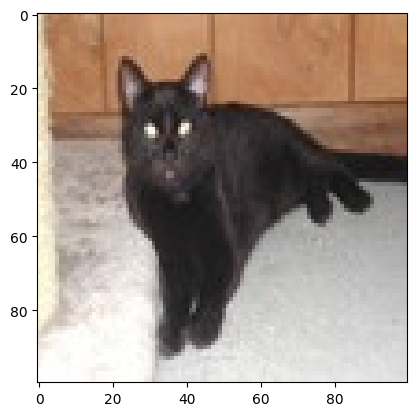

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# MODEL

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 22s 632ms/step - loss: 0.4349 - accuracy: 0.8665
Epoch 2/5
32/32 [==============================] - 20s 628ms/step - loss: 0.2516 - accuracy: 0.8965
Epoch 3/5
32/32 [==============================] - 22s 698ms/step - loss: 0.2230 - accuracy: 0.9120
Epoch 4/5
32/32 [==============================] - 20s 623ms/step - loss: 0.2257 - accuracy: 0.9305
Epoch 5/5
32/32 [==============================] - 21s 644ms/step - loss: 0.1697 - accuracy: 0.9325


In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 85ms/step - loss: 0.6989 - accuracy: 0.6800


[0.698880136013031, 0.6800000071525574]

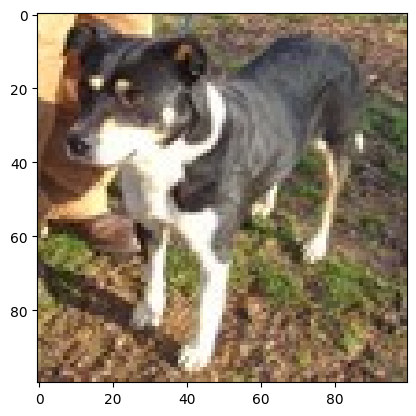

1/1 [==============================] - 0s 24ms/step
Our model says it is a : DWAGG


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if ( y_pred == 0):
  pred = 'DWAGG'
else:
  pred = "CATT"

print("Our model says it is a :", pred)